<a href="https://colab.research.google.com/github/ovimasbul83/ovimasbul83/blob/main/Firtsautoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
def generate_data(m):
    '''plots m random points on a 3D plane'''

    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:,0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.randn(m)/2
    data[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
    data[:,2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.randn(m)
    
    return data

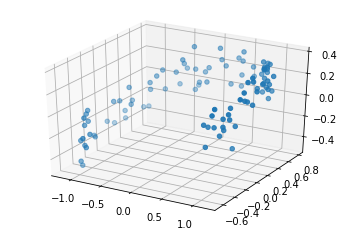

In [ ]:
X_train=generate_data(100)
ax=plt.axes(projection='3d')
ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2], cmap='Reds')

In [ ]:
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])

autoencoder = keras.models.Sequential([encoder, decoder])

In [ ]:
autoencoder.compile(loss="squared_hinge", optimizer=keras.optimizers.SGD(lr=0.1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = autoencoder.fit(X_train, X_train, epochs=1000)

Epoch 1/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.1756
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.9535
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.8338
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7536
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6988
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6608
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6325
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6089
Epoch 9/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.5903
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5770
Epoch 11/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5631
Epoch 12/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5524
Epoch 13/1000
4/4 [==============================

In [ ]:
k=encoder.predict(X_train)
k.shape

(100, 2)

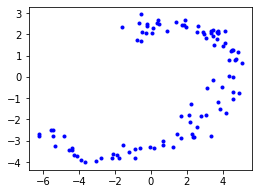

In [ ]:
fig = plt.figure(figsize=(4,3))
plt.plot(k[:,0], k[:, 1], "b.")
plt.show()

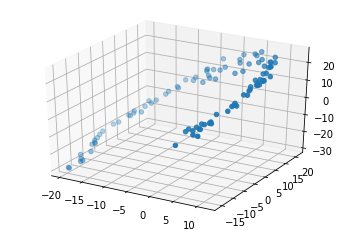

In [ ]:
m=autoencoder.predict(X_train)
ax=plt.axes(projection='3d')
ax.scatter3D(m[:,0],m[:,1],m[:,2],cmap='Reds')